### <span style="color:darkblue"> **Task 1**: Formulate problem as a **Convex Optimization Problem**, with specifying the objective function</span>

Let  
- $ X \in \mathbb{R}^{n \times d} $ : **feature matrix** (rows = samples, cols = socio-economic + geographic features)  
- $ y \in \mathbb{R}^n $ : **target vector** (median house values)  


---

In [1]:

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import nbformat as nbf
import sympy as sp
from sympy import symbols, Matrix, diff
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
from sklearn.metrics import mean_squared_error, r2_score





In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

## California Housing Dataset — Feature Description

1. **longitude**  : A measure of how far west a house is; a higher value is farther west.

2. **latitude**  : A measure of how far north a house is; a higher value is farther north.

3. **housingMedianAge**  : Median age of a house within a block; a lower number means a newer building.

4. **totalRooms**  : Total number of rooms within a block.

5. **totalBedrooms**  : Total number of bedrooms within a block.

6. **population**  : Total number of people residing within a block.

7. **households**  : Total number of households — a group of people residing within a home unit — for a block.

8. **medianIncome**  : Median income for households within a block of houses (measured in tens of thousands of US Dollars).

9. **medianHouseValue**  : Median house value for households within a block (measured in US Dollars).

### **Target** ------ "Median House Value"


#### ---------------- >>>>   Formulation as Convex Model & Objective Function : 

## Convex Model Formulation — California Housing Dataset

**Number of samples (N)** = 20640  
**Number of features (d)** = 8  
**Target (y)** = medianHouseValue  

---

### Prediction Rule:

![Prediction Rule](Equations/1.png)

For each data point in the dataset, **error = actual − predicted**, and it is defined as:

![Error Equation](Equations/2.png)

---

### Objective Function:

Our **Objective Function** is:

![Objective Function](Equations/3.png)

Therefore, we need to **minimize** \( J(w, b) \).

---

### Confirmation as Convex Model

Objective function in **Matrix Form**:

![Matrix Form](Equations/4.png)

Differentiating twice:

![Second Derivative](Equations/5.png)

![Hessian Matrix](Equations/6.png)

Since the Hessian is **Positive Semi-definite (PSD)**,  

\[
J(w,b) > 0
\]

and hence, **the objective function is convex** 

---


### Why L2 as Loss Function  ?

1. Smooth and Differentiable Everywhere

2. penalises the outliers 

3. Gradient will be continous

4. Best when residuals are normally distributed


### Why Not L1 ? 


1. Convex but not differentiable at 0

2. More robust to outliers

3. Gradient will not be continous 

---

## <span style="color:darkblue"> **Task 2** : Derive the gradient of the objective function with respect to the parameters, and write the gradient descent (GD) update rule.</span>

---

#### First we want to check the correlation between the Features

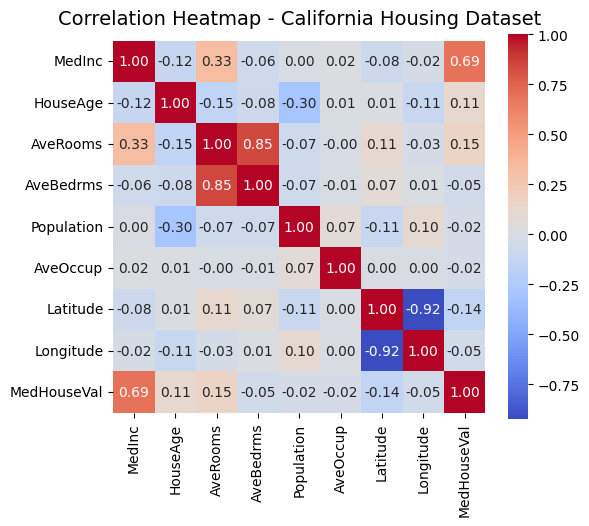

In [4]:
corr_matrix = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap - California Housing Dataset", fontsize=14, pad=12)
plt.show()

In [5]:
df.corr()['MedInc'].sort_values(ascending=False)


MedInc         1.000000
MedHouseVal    0.688075
AveRooms       0.326895
AveOccup       0.018766
Population     0.004834
Longitude     -0.015176
AveBedrms     -0.062040
Latitude      -0.079809
HouseAge      -0.119034
Name: MedInc, dtype: float64

In [6]:
cols = ['MedInc', 'AveRooms', 'Latitude', 'MedHouseVal']
df = df[cols]

fig1 = px.scatter(df, x='MedInc', y='MedHouseVal',
                  trendline='ols',
                  title='Median Income vs Median House Value',
                  color='MedHouseVal',
                  color_continuous_scale='Viridis')

fig2 = px.scatter(df, x='AveRooms', y='MedHouseVal',
                  trendline='ols',
                  title='Average Rooms vs Median House Value',
                  color='MedHouseVal',
                  color_continuous_scale='Plasma')

fig3 = px.scatter(df, x='Latitude', y='MedHouseVal',
                  trendline='ols',
                  title='Latitude vs Median House Value',
                  color='MedHouseVal',
                  color_continuous_scale='Cividis')

fig1.show()
fig2.show()
fig3.show()

##### In the Average Rooms Vs Median House Value Plot : Outliers are there ..... 

##### Outliers removal : 

In [7]:
outliers = df[df['AveRooms'] > 65]
print("Outliers count:", len(outliers))

mode_value = df['AveRooms'].mode()[0]
print("Mode of AveRooms:", mode_value)

df.loc[df['AveRooms'] > 65, 'AveRooms'] = mode_value

print("After cleaning, max AveRooms =", df['AveRooms'].max())

Outliers count: 2
Mode of AveRooms: 5.0
After cleaning, max AveRooms = 62.422222222222224


In [8]:
fig2a = px.scatter(df, x='AveRooms', y='MedHouseVal',
                  trendline='ols',
                  title='Average Rooms vs Median House Value',
                  color='MedHouseVal',
                  color_continuous_scale='Plasma')

fig2a.show()

### From all the above plots the Conclusion Can be as : 

1. Median Income is highly Correlated with Median House value ---- **More slope** --- **+ve Correlation**

2. Average count of rooms is slightly correlated with Median House value ---- **Normal Slope** --- **+ve Correlation**

3. Lattitude is slightly correlated with Median House value --- **Normal Slope** --- **-Ve Correlation**


Therefore the Selected features Were :  Medinc, Averooms, lattitude

### Our Problem is Now Simplified

- **Features (X)** : \( (X_1, X_2, X_3) \) → MedInc, AveRooms, Latitude  
- **Target (Y)** : median house value  
- **Weights** : \( w = [w_1, w_2, w_3]^T \)  

---

**Prediction Rule** :  

![image7](Equations/7.png)

---

**Error for each sample** :  

![image8](Equations/8.png)

---

**Objective Function (MSE)** :  

![image9](Equations/9.png)


- **w** = slope of line → how steep the line should be for each feature  
- **b** = starting point of line → where line starts on y-axis  

**Without both:**  
- **w only** → slope correct, line may not pass near points → still error  
- **b only** → shift line, slope wrong → still error  

**So, gradient w.r.t both w and b is needed to reach minimum error (MSE).**


#### Derivative with w  : 

Objective Function is as : 

![image10](Equations/10.png)

Derivative wrt to w1 is :

![image11](Equations/11.png)

Overall representation of derivatives of all weights :

![image12](Equations/12.png)

In Matrix form as : 

![image13](Equations/13.png)

#### Derivative with b : 

Chain rule :

![image14](Equations/14.png)

As  :

 ![image15](Equations/15.png)

The final Equation would be : 

![image16](Equations/16.png)

### Gradient Descent Update Would be as :

![image17](Equations/17.png)

### Stopping Criteria : 

1. **Max limit of Iterations:** 1000 (Let)

2. **MSE Threshold:** MSE < 10^(-6)


---

## <span style="color:darkblue"> Task - 3 :  </span>

---

#### <span style="color:green"> 3A : Implementation of **Batch Gradient Descent**</span>

In [9]:
features = ['MedInc', 'AveRooms', 'Latitude']
X = df[features].values
y = df['MedHouseVal'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
N_train, d = X_train.shape

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

w = np.zeros((d,1))  # w1, w2, w3
b = 0.0

eta = 0.01      # learning rate
max_iter = 1000 # maximum iterations
epsilon = 1e-6  # gradient norm threshold

In [10]:
def batch_gradient_descent(X, y, w, b, eta, max_iter, epsilon):
    N = X.shape[0]
    J_history = []

    for i in range(max_iter):
        # Compute prediction
        y_hat = np.dot(X, w) + b
        
        # Compute residuals
        e = y_hat - y
        
        # Compute gradients
        dw = (1/N) * np.dot(X.T, e)  # gradient w.r.t w
        db = (1/N) * np.sum(e)       # gradient w.r.t b
        
        # Update parameters
        w = w - eta * dw
        b = b - eta * db
        
        # Compute objective function (MSE)
        J = (1/(2*N)) * np.sum(e**2)
        J_history.append(J)
        
        # Stopping condition (gradient norm)
        if np.linalg.norm(dw) < epsilon and abs(db) < epsilon:
            print(f"Converged at iteration {i+1}")
            break
    
    return w, b, J_history


In [11]:
w_final, b_final, J_hist = batch_gradient_descent(X_train, y_train, w, b, eta, max_iter, epsilon)

print("Final weights:\n", w_final)
print("Final bias:\n", b_final)

w1, w2, w3 = w_final.flatten()
b_val = b_final

# Print human-readable equation
print(f"Final prediction equation is:")
print(f"y_hat = {w1:.4f} * MedInc + ({w2:.4f}) * AveRooms + ({w3:.4f}) * Latitude + {b_val:.4f}")


Final weights:
 [[ 0.83335553]
 [-0.11165152]
 [-0.08869069]]
Final bias:
 2.0718574888450343
Final prediction equation is:
y_hat = 0.8334 * MedInc + (-0.1117) * AveRooms + (-0.0887) * Latitude + 2.0719


#### <span style="color:green"> 3B : Implementation of **Mini Batch Gradient Descent** --- With 10%, 20% and 25% of dataset</span>

For Mini Batch Gradient Descent : 

![image18](Equations/18.png)

In [12]:
def mini_batch_sgd(X, y, w, b, eta, max_iter, batch_frac=0.1, epsilon=1e-6):
    N = X.shape[0]
    batch_size = int(N * batch_frac)
    J_history = []

    for iter in range(max_iter):
        # Data shuffling
        indices = np.arange(N)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, N, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # prediction
            y_hat = np.dot(X_batch, w) + b
            e = y_hat - y_batch

            # gradients
            dw = (1/batch_size) * np.dot(X_batch.T, e)
            db = (1/batch_size) * np.sum(e)

            # Update weights and bias
            w = w - eta * dw
            b = b - eta * db

        # Full dataset objective Computation
        y_hat_full = np.dot(X, w) + b
        e_full = y_hat_full - y
        J = (1/(2*N)) * np.sum(e_full**2)
        J_history.append(J)

        # Stopping condition
        if np.linalg.norm(dw) < epsilon and abs(db) < epsilon:
            print(f"Converged at iteration {iter+1}, batch fraction {batch_frac}")
            break

    return w, b, J_history


In [13]:
# Initialize weights and bias
w0 = np.zeros((d,1))
b0 = 0.0
eta = 0.01
max_iter = 1000
epsilon = 1e-6

batch_fracs = [0.10, 0.20, 0.25]
results = {}

for frac in batch_fracs:
    w_mini, b_mini, J_hist_mini = mini_batch_sgd(X_train, y_train, w0.copy(), b0, eta, max_iter, batch_frac=frac, epsilon=epsilon)
    results[frac] = (w_mini, b_mini, J_hist_mini)
    print(f"Batch fraction: {frac*100:.0f}%")
    print(f"Final weights:\n{w_mini.flatten()}")
    print(f"Final bias: {b_mini}\n")


Batch fraction: 10%
Final weights:
[ 0.83449163 -0.11296902 -0.08812559]
Final bias: 2.07190534245594

Batch fraction: 20%
Final weights:
[ 0.8345279  -0.1129457  -0.08810371]
Final bias: 2.0719048741142174

Batch fraction: 25%
Final weights:
[ 0.83459803 -0.11288899 -0.08811536]
Final bias: 2.071935184601459



### <span style="color:darkblue"> Task - 4 : Convergence and BGD and Mini Batch GD</span>

##### BGD Convergence : 

In [14]:
def batch_gradient_descent_verbose(X, y, w_init, b_init, eta=0.01, max_iter=1000, epsilon=1e-6):
    N, d = X.shape
    w = w_init.copy()
    b = b_init
    J_history = []

    print(f"{'Iteration':>10} {'w1':>10} {'w2':>10} {'w3':>10} {'b':>10} {'J(w,b)':>15}")
    
    for iter_num in range(max_iter):
        y_hat = np.dot(X, w) + b
        e = y_hat - y
        dw = (1/N) * np.dot(X.T, e)
        db = (1/N) * np.sum(e)
        
        w -= eta * dw
        b -= eta * db
        
        J = (1/(2*N)) * np.sum(e**2)
        J_history.append(J)
        
        # Print iteration-wise values
        print(f"{iter_num+1:>10} {w[0,0]:>10.4f} {w[1,0]:>10.4f} {w[2,0]:>10.4f} {b:>10.4f} {J:>15.6f}")
        
        if np.linalg.norm(dw) < epsilon and abs(db) < epsilon:
            print(f"Converged at iteration {iter_num+1}")
            break
            
    return w, b, J_history

# Run BGD verbose
w_final, b_final, J_hist = batch_gradient_descent_verbose(X_train, y_train, w0, b0, eta, max_iter, epsilon)


 Iteration         w1         w2         w3          b          J(w,b)
         1     0.0080     0.0019    -0.0017     0.0207        2.814871
         2     0.0159     0.0038    -0.0033     0.0412        2.765175
         3     0.0237     0.0057    -0.0049     0.0615        2.716493
         4     0.0314     0.0074    -0.0065     0.0816        2.668804
         5     0.0391     0.0092    -0.0081     0.1015        2.622088
         6     0.0466     0.0109    -0.0096     0.1213        2.576324
         7     0.0541     0.0126    -0.0112     0.1408        2.531493
         8     0.0615     0.0142    -0.0127     0.1601        2.487576
         9     0.0688     0.0157    -0.0142     0.1792        2.444554
        10     0.0760     0.0173    -0.0156     0.1981        2.402407
        11     0.0831     0.0188    -0.0171     0.2169        2.361118
        12     0.0902     0.0202    -0.0185     0.2354        2.320670
        13     0.0972     0.0216    -0.0200     0.2538        2.281044
      

In [15]:
print("Final weights:\n", w_final)
print("Final bias:\n", b_final)


Final weights:
 [[ 0.83335553]
 [-0.11165152]
 [-0.08869069]]
Final bias:
 2.0718574888450343


#### Mini Batch GD : 

In [16]:
def mini_batch_sgd_verbose(X, y, w_init, b_init, eta=0.01, max_iter=1000, batch_frac=0.1, epsilon=1e-6):
    N, d = X.shape
    batch_size = max(1, int(N * batch_frac))
    w = w_init.copy()
    b = b_init
    J_history = []

    print(f"\nMini-Batch {int(batch_frac*100)}% Convergence")
    print(f"{'Iteration':>10} {'w1':>10} {'w2':>10} {'w3':>10} {'b':>10} {'J(w,b)':>15}")

    for iter_num in range(max_iter):
        # Shuffle
        indices = np.arange(N)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, N, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            y_hat = np.dot(X_batch, w) + b
            e = y_hat - y_batch

            dw = (1/batch_size) * np.dot(X_batch.T, e)
            db = (1/batch_size) * np.sum(e)

            w -= eta * dw
            b -= eta * db

        # Full dataset objective
        y_hat_full = np.dot(X, w) + b
        e_full = y_hat_full - y
        J = (1/(2*N)) * np.sum(e_full**2)
        J_history.append(J)

        # Print iteration-wise values
        print(f"{iter_num+1:>10} {w[0,0]:>10.4f} {w[1,0]:>10.4f} {w[2,0]:>10.4f} {b:>10.4f} {J:>15.6f}")

        if np.linalg.norm(dw) < epsilon and abs(db) < epsilon:
            print(f"Converged at iteration {iter_num+1}")
            break

    return w, b, J_history

# Run mini-batch SGD for 10%, 20%, 25%
batch_fractions = [0.1, 0.2, 0.25]
results = {}

for frac in batch_fractions:
    w_mini, b_mini, J_hist_mini = mini_batch_sgd_verbose(X_train, y_train, w0, b0,
                                                         eta, max_iter, batch_frac=frac, epsilon=epsilon)
    results[frac] = (w_mini, b_mini, J_hist_mini)



Mini-Batch 10% Convergence
 Iteration         w1         w2         w3          b          J(w,b)
         1     0.0760     0.0173    -0.0157     0.1981        2.361059
         2     0.1441     0.0305    -0.0294     0.3773        1.991601
         3     0.2051     0.0403    -0.0415     0.5394        1.690613
         4     0.2599     0.0471    -0.0522     0.6860        1.445224
         5     0.3093     0.0515    -0.0615     0.8185        1.245039
         6     0.3537     0.0538    -0.0696     0.9384        1.081637
         7     0.3937     0.0544    -0.0766     1.0468        0.948157
         8     0.4299     0.0537    -0.0827     1.1448        0.839059
         9     0.4626     0.0518    -0.0880     1.2335        0.749840
        10     0.4922     0.0490    -0.0924     1.3136        0.676834
        11     0.5191     0.0456    -0.0962     1.3861        0.617024
        12     0.5436     0.0416    -0.0995     1.4517        0.567981
        13     0.5658     0.0372    -0.1021     1

In [17]:
print("Final iteration (1000) values for Mini-Batch SGD:\n")
for frac in batch_fractions:
    w_final, b_final, J_hist = results[frac]
    print(f"Mini-Batch {int(frac*100)}%:")
    print(f"w1 = {w_final[0,0]:.6f}, w2 = {w_final[1,0]:.6f}, w3 = {w_final[2,0]:.6f}, b = {b_final:.6f}")
    print(f"J(w,b) = {J_hist[-1]:.6f}\n")


Final iteration (1000) values for Mini-Batch SGD:

Mini-Batch 10%:
w1 = 0.834657, w2 = -0.112872, w3 = -0.088147, b = 2.072029
J(w,b) = 0.338794

Mini-Batch 20%:
w1 = 0.834572, w2 = -0.112890, w3 = -0.088113, b = 2.071933
J(w,b) = 0.338794

Mini-Batch 25%:
w1 = 0.834595, w2 = -0.112910, w3 = -0.088139, b = 2.071960
J(w,b) = 0.338794



In [18]:
# Store the final weights and bias for Mini Batch GD with 10%, 20% and 25% batch sizes

final_params_mini_batch = {}
for frac in batch_fractions:
    w_final, b_final, J_hist = results[frac]
    final_params_mini_batch[frac] = (w_final, b_final)


In [19]:
import plotly.graph_objects as go
import numpy as np

step = 20
iterations = np.arange(0, len(J_hist), step)
J_BGD = np.array(J_hist)[iterations]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=iterations+1,
    y=J_BGD,
    mode='lines+markers',
    name="BGD",
    text=[f"Iteration {i+1}: J={v:.6f}" for i,v in zip(iterations, J_BGD)],
    hoverinfo='text'
))

fig.update_layout(
    title="Convergence of Batch Gradient Descent (BGD)",
    xaxis_title="Iteration",
    yaxis_title="Objective Function J(w,b)",
    template="plotly_white",
    hovermode="closest"
)
fig.show()


In [20]:
J_mini10 = np.array(results[0.1][2])[iterations]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=iterations+1,
    y=J_mini10,
    mode='lines+markers',
    name="Mini-Batch 10%",
    text=[f"Iteration {i+1}: J={v:.6f}" for i,v in zip(iterations, J_mini10)],
    hoverinfo='text'
))

fig.update_layout(
    title="Convergence of Mini-Batch SGD (10% batch)",
    xaxis_title="Iteration",
    yaxis_title="Objective Function J(w,b)",
    template="plotly_white",
    hovermode="closest"
)
fig.show()


In [21]:
J_mini20 = np.array(results[0.2][2])[iterations]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=iterations+1,
    y=J_mini20,
    mode='lines+markers',
    name="Mini-Batch 20%",
    text=[f"Iteration {i+1}: J={v:.6f}" for i,v in zip(iterations, J_mini20)],
    hoverinfo='text'
))

fig.update_layout(
    title="Convergence of Mini-Batch SGD (20% batch)",
    xaxis_title="Iteration",
    yaxis_title="Objective Function J(w,b)",
    template="plotly_white",
    hovermode="closest"
)
fig.show()


In [22]:
J_mini25 = np.array(results[0.25][2])[iterations]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=iterations+1,
    y=J_mini25,
    mode='lines+markers',
    name="Mini-Batch 25%",
    text=[f"Iteration {i+1}: J={v:.6f}" for i,v in zip(iterations, J_mini25)],
    hoverinfo='text'
))

fig.update_layout(
    title="Convergence of Mini-Batch SGD (25% batch)",
    xaxis_title="Iteration",
    yaxis_title="Objective Function J(w,b)",
    template="plotly_white",
    hovermode="closest"
)
fig.show()


---

### <span style="color:darkblue"> Task - 5 : Compute training and MSE, With R-Score for Each Algorithm in table and Graph</span>

---

The MSE and R-Score Can be Calculated as Follows : 

![image19](Equations/19.png)

                MSE_train  R2_train  MSE_test   R2_test
BGD              0.677587  0.493119  0.689430  0.473882
Mini-Batch 10%   0.677587  0.493119  0.689432  0.473880
Mini-Batch 20%   0.677587  0.493119  0.689429  0.473882
Mini-Batch 25%   0.677587  0.493119  0.689430  0.473882


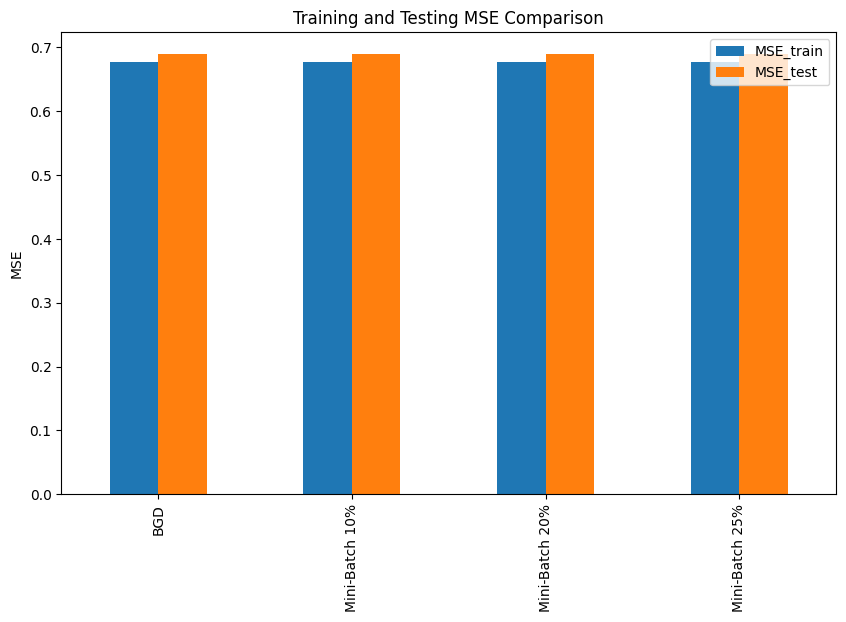

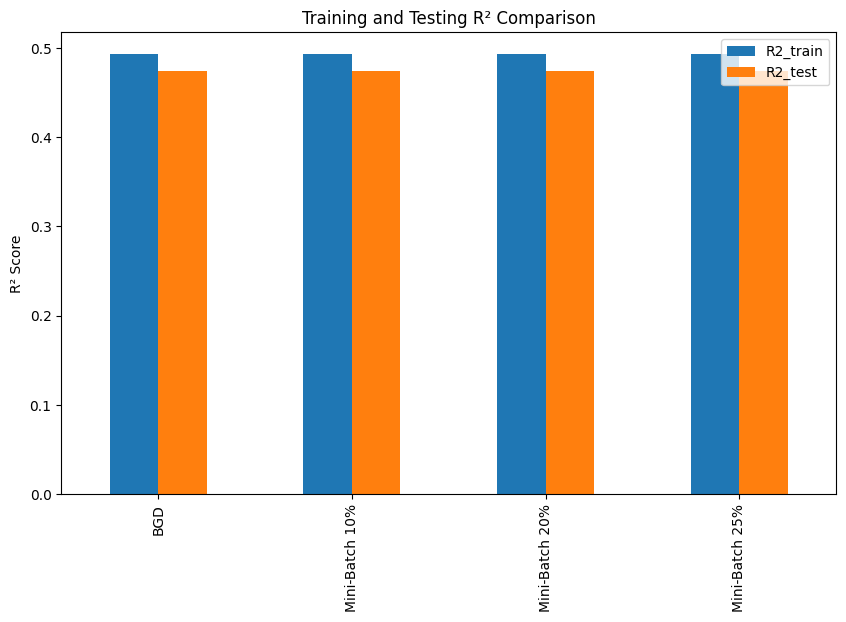

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define evaluate_model here so this cell can run independently
def evaluate_model(X, y, w, b):
    """
    Evaluate linear model predictions y_pred = X @ w + b
    Returns (mse, r2)
    """
    y_pred = X @ w + b
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# --- Store final parameters for all algorithms ---
final_params = {
    'BGD': (w_final, b_final)
}

# Add Mini-Batch SGD
for frac in batch_fractions:
    w_mini, b_mini = final_params_mini_batch[frac]
    final_params[f'Mini-Batch {int(frac*100)}%'] = (w_mini, b_mini)

# --- Evaluate all models ---
results_eval = {}
for algo, (w, b) in final_params.items():
    mse_train, r2_train = evaluate_model(X_train, y_train, w, b)
    mse_test, r2_test = evaluate_model(X_test, y_test, w, b)
    results_eval[algo] = {
        'MSE_train': mse_train,
        'R2_train': r2_train,
        'MSE_test': mse_test,
        'R2_test': r2_test
    }

# --- Convert results to DataFrame for table display ---
df_results = pd.DataFrame(results_eval).T
print(df_results)

# --- Plot MSE comparison ---
df_results[['MSE_train', 'MSE_test']].plot(kind='bar', figsize=(10,6))
plt.title("Training and Testing MSE Comparison")
plt.ylabel("MSE")
plt.show()

# --- Plot R2 comparison ---
df_results[['R2_train', 'R2_test']].plot(kind='bar', figsize=(10,6))
plt.title("Training and Testing R² Comparison")
plt.ylabel("R² Score")
plt.show()


#### Predicitions : 

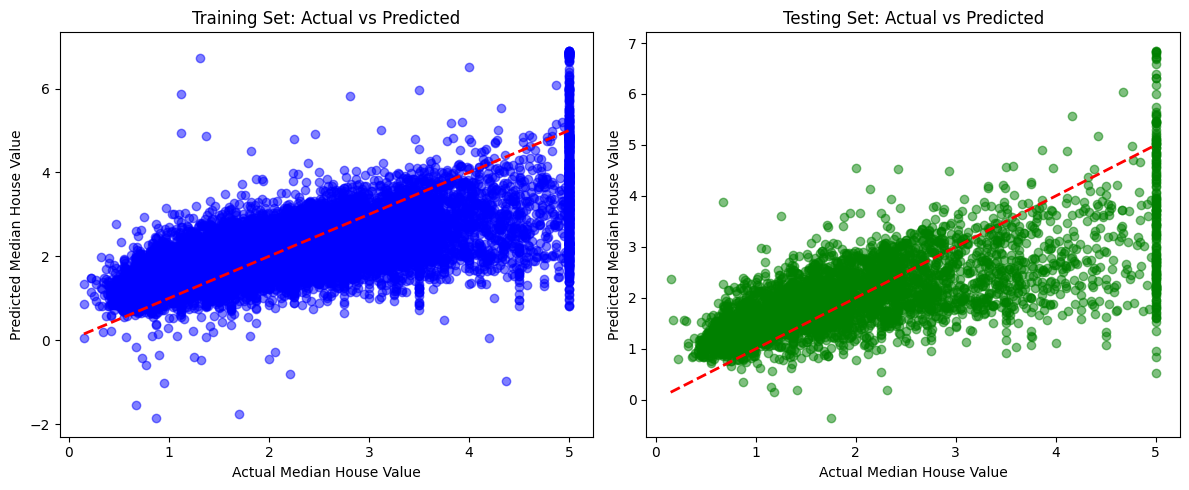

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Predictions for train and test
y_train_pred = X_train @ w_final + b_final
y_test_pred  = X_test  @ w_final + b_final

# Plot
plt.figure(figsize=(12,5))

# Training set
plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title("Training Set: Actual vs Predicted")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")

# Testing set
plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Testing Set: Actual vs Predicted")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")

plt.tight_layout()
plt.show()


#### Results From Above : 

1. We can Explain only the 50% Variance 

2. We can Predict only the half of the values 

3. Model is very simple as we are taking only the mostly correlated features 

4. In General, House Price prediction is Complex in Nature 


### What if we use all Features ?

In [25]:

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target.reshape(-1,1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


N, d = X_train.shape
w0 = np.zeros((d,1))
b0 = 0
eta = 0.01
max_iter = 1000
epsilon = 1e-6


def batch_gradient_descent(X, y, w_init, b_init, eta, max_iter, epsilon):
    N, d = X.shape
    w = w_init.copy()
    b = b_init
    J_history = []

    for iter_num in range(max_iter):
        y_hat = np.dot(X, w) + b
        e = y_hat - y
        dw = (1/N) * np.dot(X.T, e)
        db = (1/N) * np.sum(e)
        w -= eta * dw
        b -= eta * db
        J = (1/(2*N)) * np.sum(e**2)
        J_history.append(J)
        if np.linalg.norm(dw) < epsilon and abs(db) < epsilon:
            break
    return w, b, J_history

w_bgd, b_bgd, J_bgd = batch_gradient_descent(X_train, y_train, w0, b0, eta, max_iter, epsilon)



def mini_batch_sgd(X, y, w_init, b_init, eta=0.01, max_iter=1000, batch_frac=0.1, epsilon=1e-6):
    N, d = X.shape
    batch_size = max(1, int(N * batch_frac))
    w = w_init.copy()
    b = b_init
    J_history = []

    for iter_num in range(max_iter):
        indices = np.arange(N)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, N, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            y_hat = np.dot(X_batch, w) + b
            e = y_hat - y_batch
            dw = (1/batch_size) * np.dot(X_batch.T, e)
            db = (1/batch_size) * np.sum(e)
            w -= eta * dw
            b -= eta * db

        y_hat_full = np.dot(X, w) + b
        e_full = y_hat_full - y
        J = (1/(2*N)) * np.sum(e_full**2)
        J_history.append(J)

        if np.linalg.norm(dw) < epsilon and abs(db) < epsilon:
            break

    return w, b, J_history

batch_fractions = [0.1, 0.2, 0.25]
results_mini = {}

for frac in batch_fractions:
    w_m, b_m, J_m = mini_batch_sgd(X_train, y_train, w0, b0, eta, max_iter, batch_frac=frac, epsilon=epsilon)
    results_mini[frac] = (w_m, b_m, J_m)

def evaluate_model(X, y, w, b):
    y_pred = np.dot(X, w) + b
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2


results_table = []

# BGD
mse_train, r2_train = evaluate_model(X_train, y_train, w_bgd, b_bgd)
mse_test, r2_test = evaluate_model(X_test, y_test, w_bgd, b_bgd)
results_table.append(['BGD', mse_train, r2_train, mse_test, r2_test])

# Mini-Batch
for frac in batch_fractions:
    w_m, b_m, _ = results_mini[frac]
    mse_train, r2_train = evaluate_model(X_train, y_train, w_m, b_m)
    mse_test, r2_test = evaluate_model(X_test, y_test, w_m, b_m)
    results_table.append([f'Mini-Batch {int(frac*100)}%', mse_train, r2_train, mse_test, r2_test])

df_results = pd.DataFrame(results_table, columns=['Algorithm', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])
print(df_results)


        Algorithm  MSE_train  R2_train  MSE_test   R2_test
0             BGD   0.548713  0.589526  0.567340  0.567051
1  Mini-Batch 10%   0.517934  0.612551  0.555906  0.575777
2  Mini-Batch 20%   0.518062  0.612455  0.555770  0.575880
3  Mini-Batch 25%   0.518382  0.612215  0.555064  0.576419


### Previously R2 Score was around 0.47 and now it is 0.57 after adding all features 

### Why still only 57, Math is good and also all Features got Selected ?

# How to Improve Model Performance

1. **Feature Engineering**  
   Create new features or combinations of existing ones to capture more patterns.  
   
2. **Outlier Handling**  
   Identify and remove or adjust extreme values in the dataset that may distort the model.

3. **Non-linear Models**  
   Linear regression is limited. Consider using more complex models.

4. **Regularization Tuning**  
   L1 (Lasso) or L2 (Ridge) penalties prevent overfitting. Tuning the regularization strength can improve performance.

5. **Feature Selection / Dimensionality Reduction**  
   Remove highly correlated features or use PCA to reduce dimensions while keeping important information.


### Let's Check the Skewness of the Variables 

![image20](Equations/20.png)

Feature Skewness:
 AveOccup      97.639561
AveBedrms     31.316956
AveRooms      20.697869
Population     4.935858
MedInc         1.646657
Latitude       0.465953
HouseAge       0.060331
Longitude     -0.297801
dtype: float64


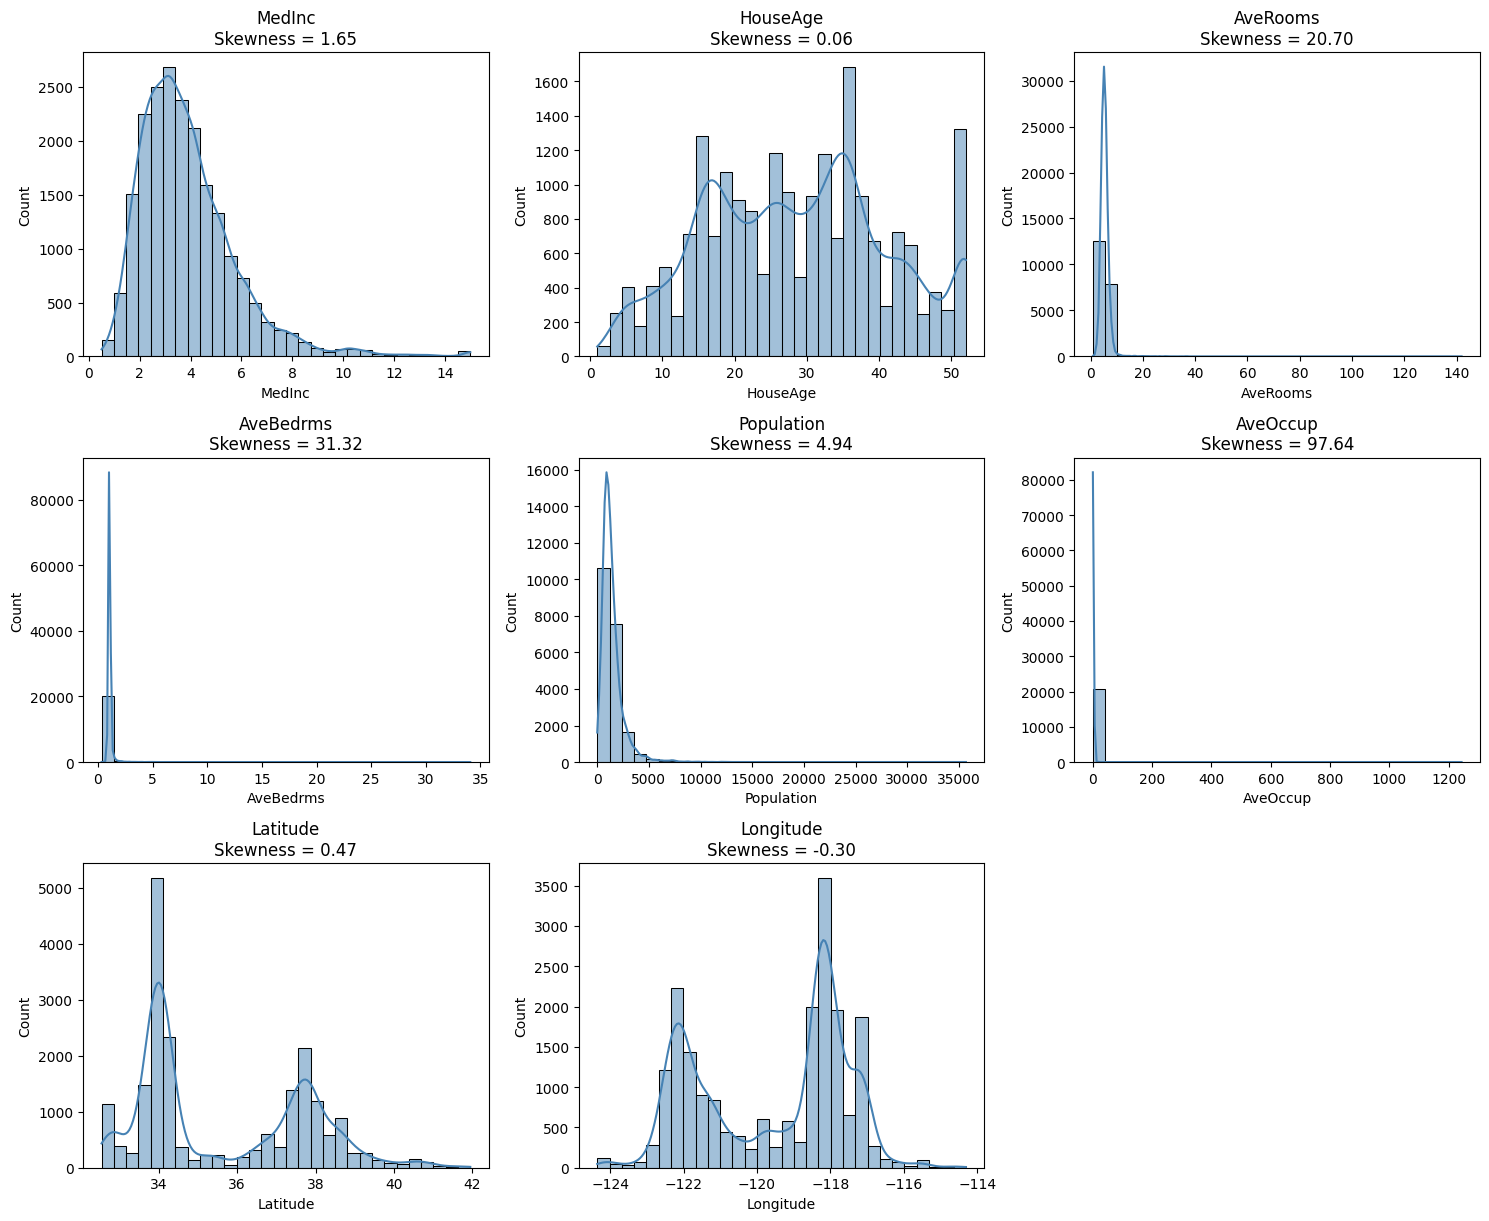

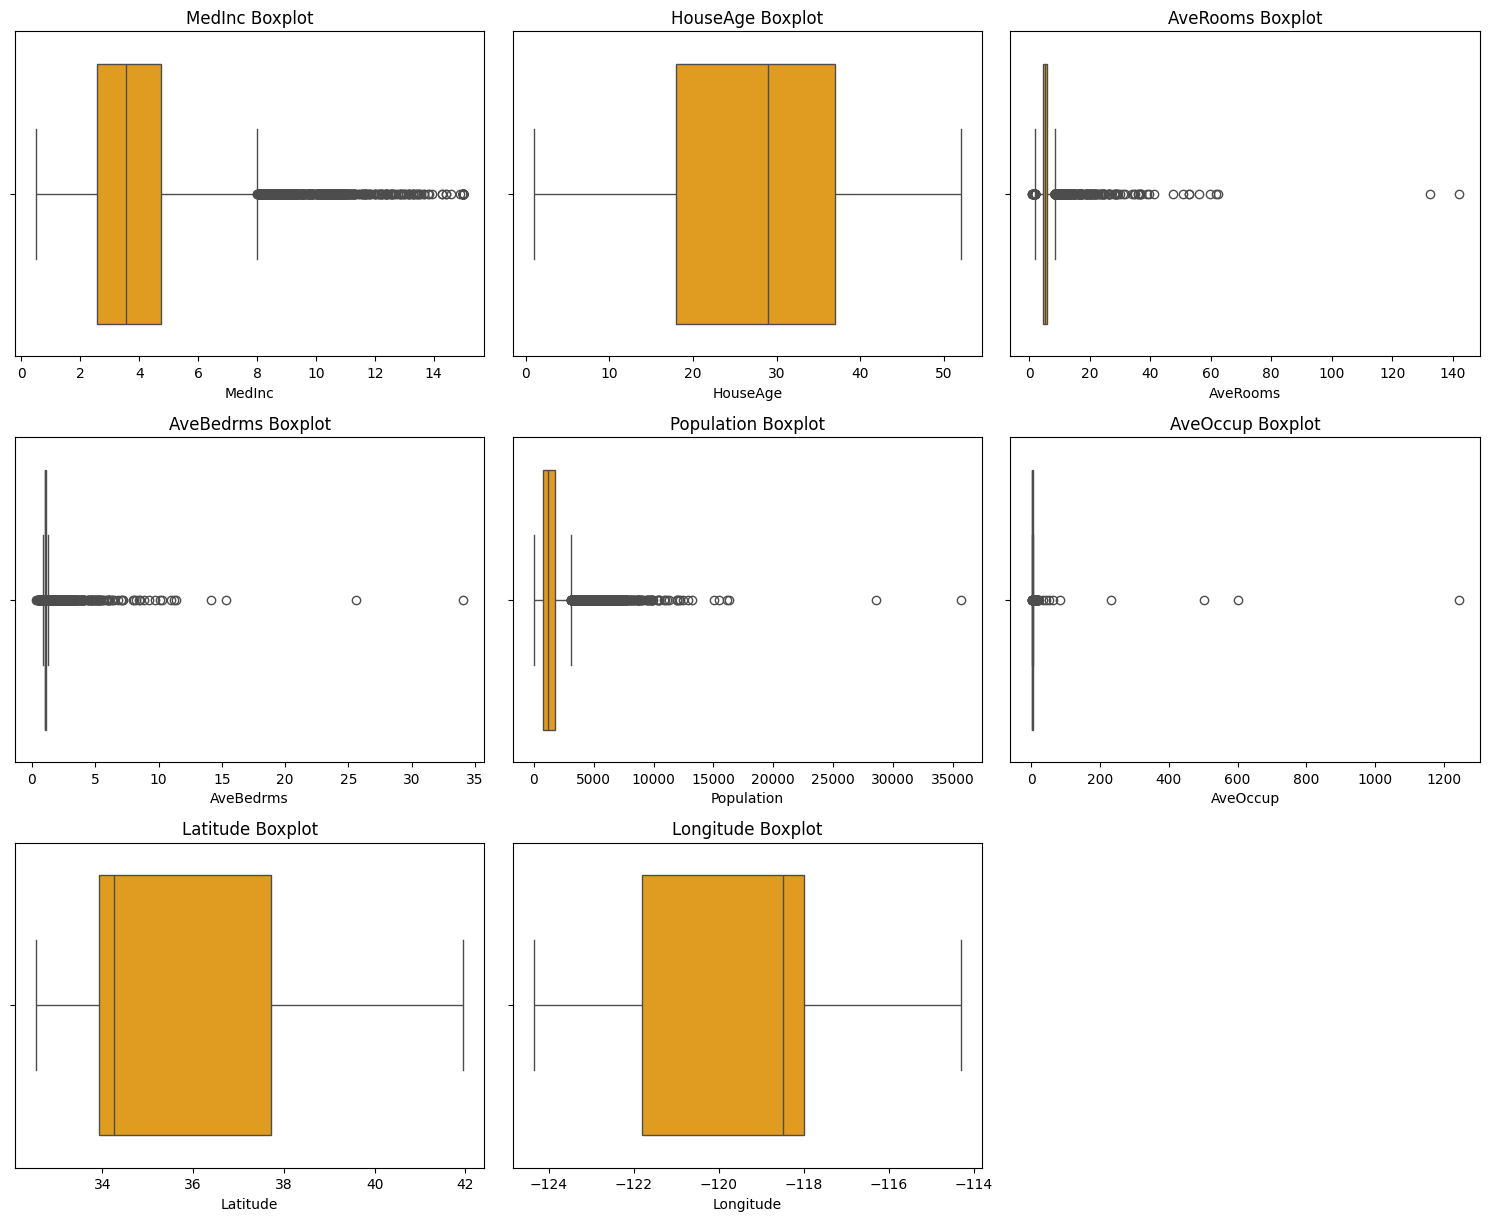

In [26]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['median_house_value'] = data.target

features = df.columns.drop('median_house_value')

# Compute skewness
skewness = df[features].skew().sort_values(ascending=False)
print("Feature Skewness:\n", skewness)

# Visualize distributions
plt.figure(figsize=(15, 20))
for i, col in enumerate(features, 1):
    plt.subplot(5, 3, i)   # adjust grid depending on number of features
    sns.histplot(df[col], kde=True, color='steelblue', bins=30)
    plt.title(f"{col}\nSkewness = {df[col].skew():.2f}")
plt.tight_layout()
plt.show()

# Optional: Boxplots for Outlier Visualization
plt.figure(figsize=(15, 20))
for i, col in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


##  Problems with Skewed Data

When the feature distribution is **highly skewed**, it violates the assumptions of many statistical and machine learning models (especially linear regression).  
This leads to unstable training, biased predictions, and poor generalization.

---

###  1. Mean ≠ Median ≠ Mode → Bias in Linear Models

- In skewed distributions, mean, median, and mode differ significantly.
- Linear Regression minimizes the **Mean Squared Error (MSE)**
- Thus, **outliers dominate** the model — pulling the regression line toward the tail and biasing predictions.

**→ Effect:** Poor fit for majority of samples.

---

###  2. Heteroscedasticity (Non-Constant Variance)

- Skewed data often causes **non-constant variance of residuals**:
- Violates one of the core linear model assumptions.
- Leads to **biased standard errors**, invalid p-values, and unreliable confidence intervals.

**→ Effect:** Statistical inference becomes incorrect; model is not robust.

---

###  3. Gradient Descent Becomes Unstable

- Gradient updates depend on the magnitude of features
- Causes **slower convergence**, **unstable training**, or **suboptimal minima**.

**→ Effect:** Optimization oscillates or converges poorly.

---

##  Solutions to Handle Skewness

| Problem | Practical Fix | Explanation |
|----------|----------------|-------------|
| Bias due to outliers | **Apply log / sqrt / Box-Cox transform** | Compresses large values and stabilizes mean–variance relationship |
| Heteroscedasticity | **Variance-stabilizing transforms (log/yeo-johnson)** | Makes residuals more homoscedastic (constant variance) |
| Gradient instability | **Feature scaling (StandardScaler / MinMaxScaler)** | Normalizes feature magnitudes for smooth gradient flow |
| Strong outliers | **Winsorization / Capping / Clipping** | Limit extreme tail values |
| Very complex skew | **Use non-linear models (Tree-based, SVR, NN)** | Models nonlinear relationships that linear models can’t capture |

---



##  Common Transformations for Skewed Data

| Skew Type                       | Shape                   | Typical Fixes                                
| ------------------------------- | ----------------------- | --------------------------------------------
| **Right-skewed**                | Long right tail         | Log Transform                                
|                                 |                         | Square Root                                  
|                                 |                         | Cube Root                                    
|                                 |                         | Reciprocal                                  
| **Left-skewed**                 | Long left tail          | Square / Cube                               
|                                 |                         | Exponential                                  
| **Symmetric but Non-normal**    | Moderate deviations     | Box–Cox Transform                            
| **Zeros or Negatives Present**  | Right-skewed with zeros | Yeo–Johnson Transform


### Let's Study Each feature Seperately 

#### 1. Median Income :

Histogram --- Used for Understanding Distribution and Outliers

Text(0.5, 1.0, 'Distribution of Median Income')

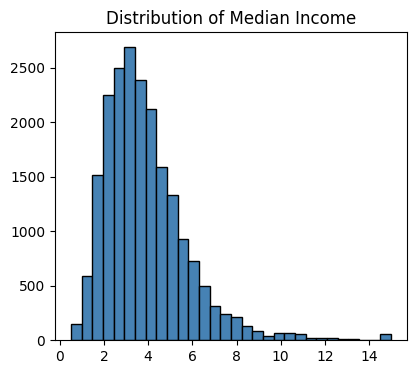

In [27]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Medinc'] = data.data[:, 0]  # Median Income


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Medinc'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of Median Income")



In [28]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Medinc  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      3.870671  
std       10.386050      2.135952      2.003532      1.899822  
min        0.692308     32.540000   -124.350000      0.499900  
25%        2.429741     33.930000   -121.800000      2.563400  
50%        2.818116     34.260000   -118.490000      3.534800  
75%        3.282261     37.710000   -118.010000      4.743250  
max     1243.333333     41.950000   -114.310000     15.000100

In [29]:
#Count no of zeros or negatives & Skewness in Median Income
zero_count = (df['Medinc'] == 0).sum()
negative_count = (df['Medinc'] < 0).sum()
print(f"Number of zeros in Median Income: {zero_count}")
print(f"Number of negative values in Median Income: {negative_count}")

df['Medinc'].skew()


Number of zeros in Median Income: 0
Number of negative values in Median Income: 0


np.float64(1.6466567021344465)

##### If Skewness > 1 ---> Apply Log Transformation
##### If 0.5 < Skewness < 1 ---> Apply Sqrt transformation

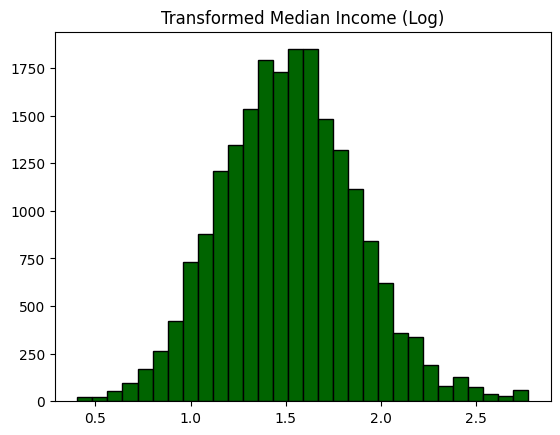

Original skew: 1.6466567021344465
Transformed skew: 0.22608313067130548


In [30]:
# Applying the Log transformation

df['Medinc_log'] = np.log1p(df['Medinc'])

plt.hist(df['Medinc_log'], bins=30, color='darkgreen', edgecolor='black')
plt.title("Transformed Median Income (Log)")
plt.show()

print("Original skew:", df['Medinc'].skew())
print("Transformed skew:", df['Medinc_log'].skew())


In [31]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Medinc    Medinc_log  
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      3.870671      1.516995  
std       10.386050      2.135952      2.003532      1.899822      0.358677  
min        0.692308     32.540000   -124.350000      0.499900      0.405398  
25%        2.429741     33.930000   -121.800000      2.563400      1.270715  
50%        2.818116     34.260000   -118.490000      3.534800      1.511781  
75%        3.282261     37.710000   -118.010000      4.743250      1.748025  
max     1243.333333     41.950000   -114.310000     15.000100      2.772595

### 2. Housing Median Age 

Text(0.5, 1.0, 'Distribution of House Age')

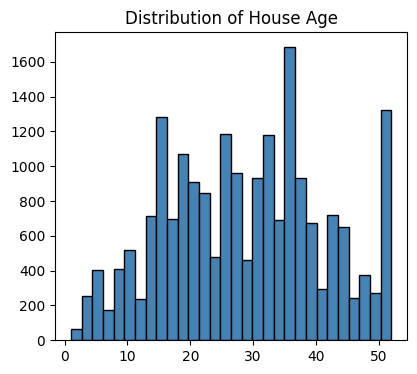

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['HouseAge'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of House Age")

In [33]:
#Count no of zeros or negatives & Skewness in HouseAge
zero_count = (df['HouseAge'] == 0).sum()
negative_count = (df['HouseAge'] < 0).sum()
print(f"Number of zeros in House Age: {zero_count}")
print(f"Number of negative values in House Age: {negative_count}")
df['HouseAge'].skew()



Number of zeros in House Age: 0
Number of negative values in House Age: 0


np.float64(0.060330637599136865)

#####  No Transformation Needed For House median Age 

### 3. Average No of Rooms 

Text(0.5, 1.0, 'Distribution of Average Rooms')

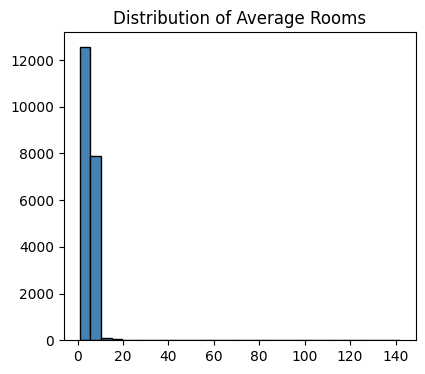

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['AveRooms'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of Average Rooms")

In [35]:
#Count no of zeros or negatives & Skewness in AveRooms

zero_count = (df['AveRooms'] == 0).sum()
negative_count = (df['AveRooms'] < 0).sum()
print(f"Number of zeros in Average Rooms: {zero_count}")
print(f"Number of negative values in Average Rooms: {negative_count}")
df['AveRooms'].skew()



Number of zeros in Average Rooms: 0
Number of negative values in Average Rooms: 0


np.float64(20.697868956710646)

In [36]:
#Finding the Summary Statistics for Average No of Rooms
summary = df['AveRooms'].describe().T
print(summary)


count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64


In [37]:
# Replacing the outliers with Mode 
mode_value = df['AveRooms'].mode()[0]
df.loc[df['AveRooms'] > 65, 'AveRooms'] = mode_value


In [38]:
summary = df['AveRooms'].describe().T
print(summary)

count    20640.000000
mean         5.416188
std          2.106209
min          0.846154
25%          4.440716
50%          5.228714
75%          6.052096
max         62.422222
Name: AveRooms, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Rooms')

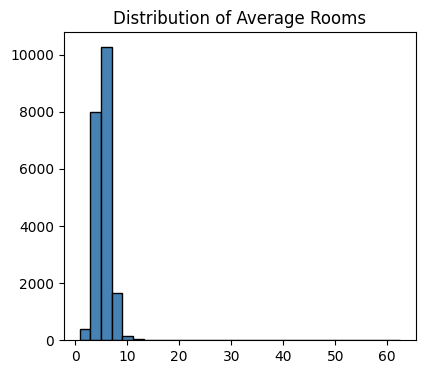

In [39]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['AveRooms'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of Average Rooms")

In [40]:
#Skewness after outlier treatment
df['AveRooms'].skew()


np.float64(9.735904326903938)

##### Log Transformation :

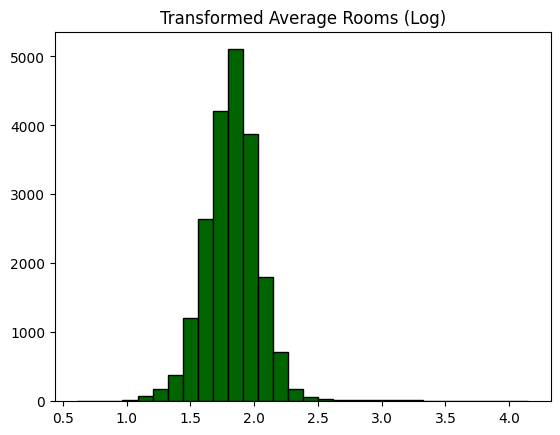

Transformed skew: 1.1941128112163357


In [41]:
# Applying Log Transformation
df['AveRooms_log'] = np.log1p(df['AveRooms'])
plt.hist(df['AveRooms_log'], bins=30, color='darkgreen', edgecolor='black')
plt.title("Transformed Average Rooms (Log)")
plt.show()
print("Transformed skew:", df['AveRooms_log'].skew())


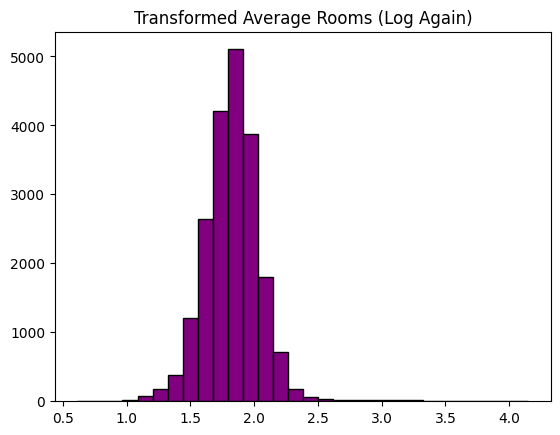

Transformed skew again: 1.1941128112163357


In [42]:
# Again applying the Log transformation for better results

df['AveRooms_log2'] = np.log1p(df['AveRooms'])
plt.hist(df['AveRooms_log2'], bins=30, color='purple', edgecolor='black')
plt.title("Transformed Average Rooms (Log Again)")
plt.show()
print("Transformed skew again:", df['AveRooms_log2'].skew())



### So We apply box-cox transformation to the main column

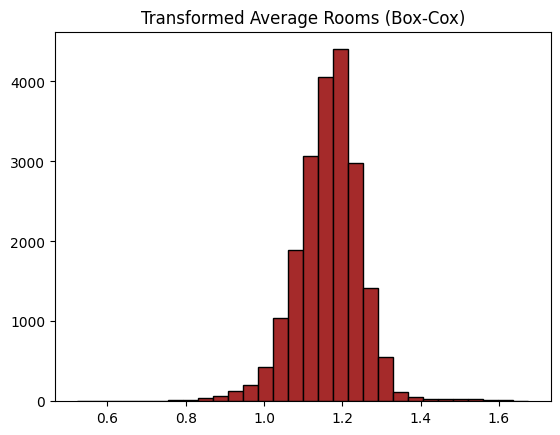

Box-Cox transformed skew: -0.1553014747638362


In [43]:
# Applying the box-cox transformation for the AveRooms feature Directly

from scipy import stats
df['AveRooms_boxcox'], fitted_lambda = stats.boxcox(df['AveRooms'] + 1)  # Adding 1 to avoid zero values
plt.hist(df['AveRooms_boxcox'], bins=30, color='brown', edgecolor='black')
plt.title("Transformed Average Rooms (Box-Cox)")
plt.show()
print("Box-Cox transformed skew:", df['AveRooms_boxcox'].skew())


In [44]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.416188      1.096675   1425.476744   
std        1.899822     12.585558      2.106209      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.228714      1.048780   1166.000000   
75%        4.743250     37.000000      6.052096      1.099526   1725.000000   
max       15.000100     52.000000     62.422222     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Medinc    Medinc_log  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.070655     35.631861   -119.569704      3.870671      1.516995   
std       10.386050      2.135952      2.003532      1.899822      0.358677   
min        0.692308     32.540000   -124.350000      0.499900      0.405398   
25%        2.429741     33.930000   -121.800000      2.563400      1.270715   
50%        2.818116     34.260000   -118.490000      3.534800      1.511781   
75%        3.282261     37.710000   -118.010000      4.743250      1.748025   
max     1243.333333     41.950000   -114.310000     15.000100      2.772595   

       AveRooms_log  AveRooms_log2  AveRooms_boxcox  
count  20640.000000   20640.000000     20640.000000  
mean       1.828419       1.828419         1.164780  
std        0.229923       0.229923         0.084218  
min        0.613104       0.613104         0.523297  
25%        1.693911       1.693911         1.117109  
50%        1.829170       1.829170         1.170194  
75%        1.953325       1.953325         1.215677  
max        4.149814       4.149814         1.675156

In [45]:
# Dropping the original columns after transformation
df = df.drop(columns=['Medinc', 'AveRooms', 'MedInc'])

# Also drop intermediate transformed columns to keep only final ones
df = df.drop(columns=['AveRooms_log', 'AveRooms_log2'])

df.describe()

HouseAge     AveBedrms    Population      AveOccup      Latitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean      28.639486      1.096675   1425.476744      3.070655     35.631861   
std       12.585558      0.473911   1132.462122     10.386050      2.135952   
min        1.000000      0.333333      3.000000      0.692308     32.540000   
25%       18.000000      1.006079    787.000000      2.429741     33.930000   
50%       29.000000      1.048780   1166.000000      2.818116     34.260000   
75%       37.000000      1.099526   1725.000000      3.282261     37.710000   
max       52.000000     34.066667  35682.000000   1243.333333     41.950000   

          Longitude    Medinc_log  AveRooms_boxcox  
count  20640.000000  20640.000000     20640.000000  
mean    -119.569704      1.516995         1.164780  
std        2.003532      0.358677         0.084218  
min     -124.350000      0.405398         0.523297  
25%     -121.800000      1.270715         1.117109  
50%     -118.490000      1.511781         1.170194  
75%     -118.010000      1.748025         1.215677  
max     -114.310000      2.772595         1.675156

## 4. Average Bedrooms : 

Text(0.5, 1.0, 'Distribution of Average Bedrooms')

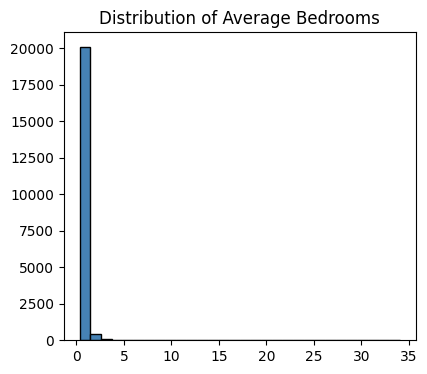

In [46]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['AveBedrms'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of Average Bedrooms")

In [47]:
#Count no of zeros or negatives & Skewness in bedrooms
zero_count = (df['AveBedrms'] == 0).sum()
negative_count = (df['AveBedrms'] < 0).sum()
print(f"Number of zeros in Average Bedrooms: {zero_count}")
print(f"Number of negative values in Average Bedrooms: {negative_count}")
df['AveBedrms'].skew()



Number of zeros in Average Bedrooms: 0
Number of negative values in Average Bedrooms: 0


np.float64(31.316956246782663)

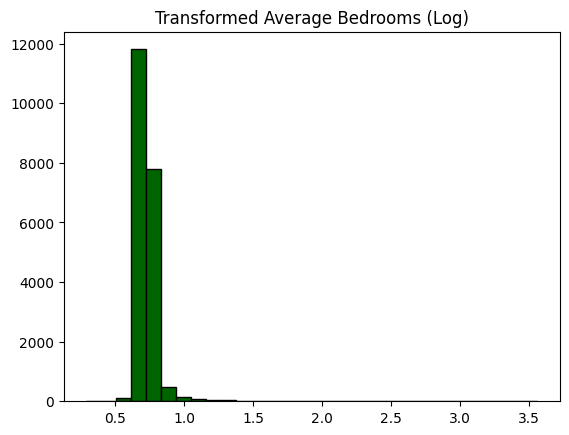

Transformed skew: 8.988786093389573


In [48]:
#Applying Log Transformation

df['AveBedrms_log'] = np.log1p(df['AveBedrms'])
plt.hist(df['AveBedrms_log'], bins=30, color='darkgreen', edgecolor='black')
plt.title("Transformed Average Bedrooms (Log)")
plt.show()
print("Transformed skew:", df['AveBedrms_log'].skew())


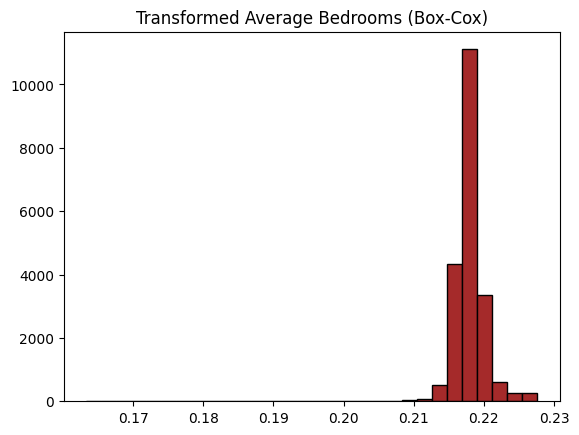

Box-Cox transformed skew: -1.446666850345764


In [49]:
# So applying Box-Cox Transformation for AveBedrms feature Directly and dropping the log transformed column

from scipy import stats
df['AveBedrms_boxcox'], fitted_lambda = stats.boxcox(df['AveBedrms'] + 1)  # Adding 1 to avoid zero values
plt.hist(df['AveBedrms_boxcox'], bins=30, color='brown', edgecolor='black')
plt.title("Transformed Average Bedrooms (Box-Cox)")
plt.show()
print("Box-Cox transformed skew:", df['AveBedrms_boxcox'].skew())
df = df.drop(columns=['AveBedrms', 'AveBedrms_log'])



In [50]:
df.describe()

HouseAge    Population      AveOccup      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean      28.639486   1425.476744      3.070655     35.631861   -119.569704   
std       12.585558   1132.462122     10.386050      2.135952      2.003532   
min        1.000000      3.000000      0.692308     32.540000   -124.350000   
25%       18.000000    787.000000      2.429741     33.930000   -121.800000   
50%       29.000000   1166.000000      2.818116     34.260000   -118.490000   
75%       37.000000   1725.000000      3.282261     37.710000   -118.010000   
max       52.000000  35682.000000   1243.333333     41.950000   -114.310000   

         Medinc_log  AveRooms_boxcox  AveBedrms_boxcox  
count  20640.000000     20640.000000      20640.000000  
mean       1.516995         1.164780          0.217974  
std        0.358677         0.084218          0.002259  
min        0.405398         0.523297          0.163289  
25%        1.270715         1.117109          0.216898  
50%        1.511781         1.170194          0.217842  
75%        1.748025         1.215677          0.218835  
max        2.772595         1.675156          0.227579

### 5. Population : 

Text(0.5, 1.0, 'Distribution of Average Population')

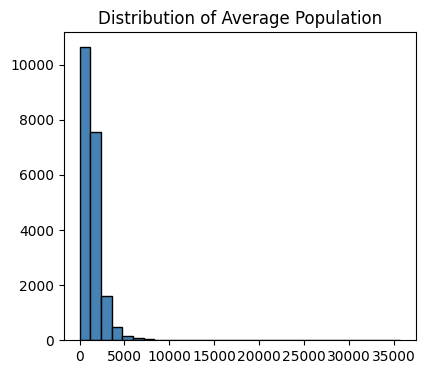

In [51]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Population'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of Average Population")

In [52]:
# Count no of zeros or negatives & Skewness in Population
zero_count = (df['Population'] == 0).sum()
negative_count = (df['Population'] < 0).sum()
print(f"Number of zeros in Population: {zero_count}")
print(f"Number of negative values in Population: {negative_count}")
df['Population'].skew()


Number of zeros in Population: 0
Number of negative values in Population: 0


np.float64(4.93585822672712)

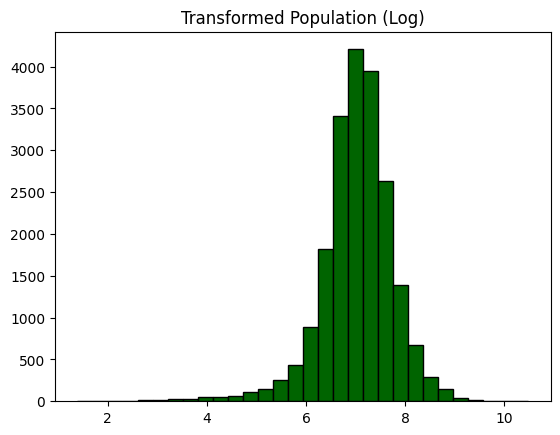

Transformed skew: -1.0440866961519721


In [53]:
# Applying Log Transformation

df['Population_log'] = np.log1p(df['Population'])
plt.hist(df['Population_log'], bins=30, color='darkgreen', edgecolor='black')
plt.title("Transformed Population (Log)")
plt.show()
print("Transformed skew:", df['Population_log'].skew())



In [54]:
#Dropping the original Population column after transformation

df = df.drop(columns=['Population'])
df.describe()


HouseAge      AveOccup      Latitude     Longitude    Medinc_log  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean      28.639486      3.070655     35.631861   -119.569704      1.516995   
std       12.585558     10.386050      2.135952      2.003532      0.358677   
min        1.000000      0.692308     32.540000   -124.350000      0.405398   
25%       18.000000      2.429741     33.930000   -121.800000      1.270715   
50%       29.000000      2.818116     34.260000   -118.490000      1.511781   
75%       37.000000      3.282261     37.710000   -118.010000      1.748025   
max       52.000000   1243.333333     41.950000   -114.310000      2.772595   

       AveRooms_boxcox  AveBedrms_boxcox  Population_log  
count     20640.000000      20640.000000    20640.000000  
mean          1.164780          0.217974        7.025503  
std           0.084218          0.002259        0.736238  
min           0.523297          0.163289        1.386294  
25%           1.117109          0.216898        6.669498  
50%           1.170194          0.217842        7.062192  
75%           1.215677          0.218835        7.453562  
max           1.675156          0.227579       10.482430

### 6. AveOccup : 

Text(0.5, 1.0, 'Distribution of Average Occupancy')

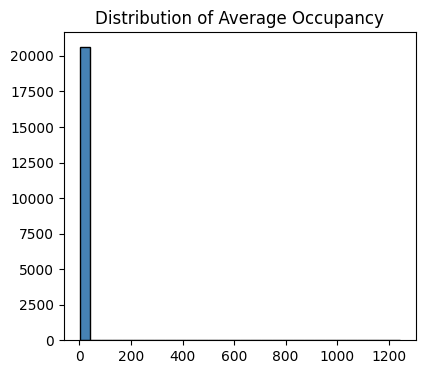

In [55]:
# Histogram of AveOccupation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['AveOccup'], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribution of Average Occupancy")


In [56]:
# Count no of zeros or negatives & Skewness in AveOccup
zero_count = (df['AveOccup'] == 0).sum()
negative_count = (df['AveOccup'] < 0).sum()
print(f"Number of zeros in Average Occupancy: {zero_count}")
print(f"Number of negative values in Average Occupancy: {negative_count}")
df['AveOccup'].skew()


Number of zeros in Average Occupancy: 0
Number of negative values in Average Occupancy: 0


np.float64(97.63956096369479)

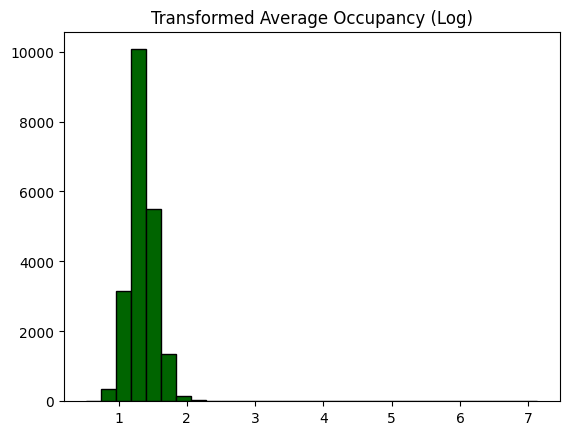

Transformed skew: 3.8796788829093227


In [57]:
# Applying Log Transformation for AveOccup

df['AveOccup_log'] = np.log1p(df['AveOccup'])
plt.hist(df['AveOccup_log'], bins=30, color='darkgreen', edgecolor='black')
plt.title("Transformed Average Occupancy (Log)")
plt.show()
print("Transformed skew:", df['AveOccup_log'].skew())



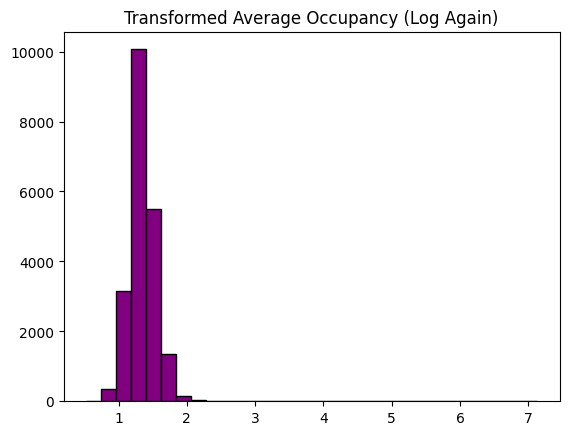

Transformed skew again: 3.8796788829093227


In [58]:
# Applying Log Transformation again for better results
df['AveOccup_log2'] = np.log1p(df['AveOccup'])
plt.hist(df['AveOccup_log2'], bins=30, color='purple', edgecolor='black')
plt.title("Transformed Average Occupancy (Log Again)")
plt.show()
print("Transformed skew again:", df['AveOccup_log2'].skew())


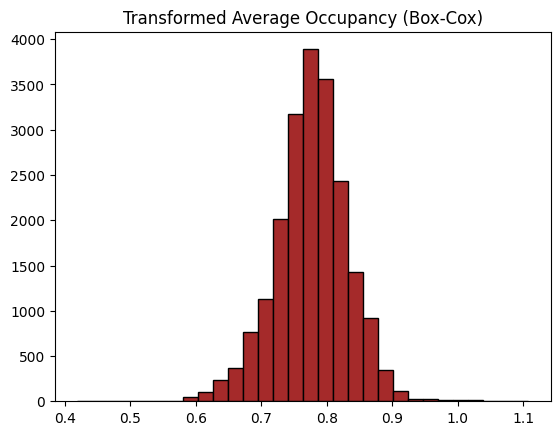

Box-Cox transformed skew: -0.10688770830394234


In [59]:
# So Applying Box-Cox Transformation for AveOccup feature Directly and dropping the log transformed columns

from scipy import stats
df['AveOccup_boxcox'], fitted_lambda = stats.boxcox(df['AveOccup'] + 1)  # Adding 1 to avoid zero values
plt.hist(df['AveOccup_boxcox'], bins=30, color='brown', edgecolor='black')
plt.title("Transformed Average Occupancy (Box-Cox)")
plt.show()
print("Box-Cox transformed skew:", df['AveOccup_boxcox'].skew())


In [60]:
# Dropping the original AveOccup column and log transformed columns after Box-Cox transformation

df = df.drop(columns=['AveOccup', 'AveOccup_log', 'AveOccup_log2'])
df.describe()


HouseAge      Latitude     Longitude    Medinc_log  \
count  20640.000000  20640.000000  20640.000000  20640.000000   
mean      28.639486     35.631861   -119.569704      1.516995   
std       12.585558      2.135952      2.003532      0.358677   
min        1.000000     32.540000   -124.350000      0.405398   
25%       18.000000     33.930000   -121.800000      1.270715   
50%       29.000000     34.260000   -118.490000      1.511781   
75%       37.000000     37.710000   -118.010000      1.748025   
max       52.000000     41.950000   -114.310000      2.772595   

       AveRooms_boxcox  AveBedrms_boxcox  Population_log  AveOccup_boxcox  
count     20640.000000      20640.000000    20640.000000     20640.000000  
mean          1.164780          0.217974        7.025503         0.776290  
std           0.084218          0.002259        0.736238         0.055507  
min           0.523297          0.163289        1.386294         0.418943  
25%           1.117109          0.216898        6.669498         0.744149  
50%           1.170194          0.217842        7.062192         0.777816  
75%           1.215677          0.218835        7.453562         0.810396  
max           1.675156          0.227579       10.482430         1.107651

### 6. Study about Longitude and Lattitude : 

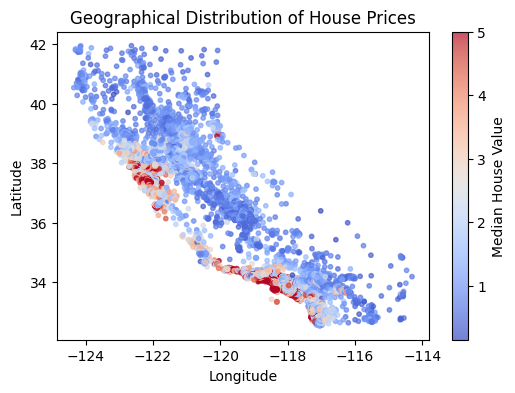

In [61]:
data = fetch_california_housing()
df1 = pd.DataFrame(data.data, columns=data.feature_names)
df1['median_house_value'] = data.target
data = df1[['Longitude', 'Latitude', 'median_house_value']]


plt.figure(figsize=(6, 4))
sc = plt.scatter(
    data["Longitude"], 
    data["Latitude"],
    c=data["median_house_value"],   
    cmap="coolwarm",
    s=10,                         
    alpha=0.7                     
)

plt.colorbar(sc, label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of House Prices")
plt.show()

#### Here we Can observe that, only two clusters are the places where the Prices are very high, so We try to encode this data to the linear continous model so that we can priortise their weights for our model

And the regions are : 

Region 1: latitude ≈ [36, 38], longitude ≈ [–123, –121] → Northern/Coastal area → high prices (probably SF Bay area)

Region 2: latitude ≈ [33, 35], longitude ≈ [–120, –119] → Southern area → moderate/high prices (maybe LA region)

In [62]:
df1.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  median_house_value  
count  20640.000000  20640.000000  20640.000000        20640.000000  
mean       3.070655     35.631861   -119.569704            2.068558  
std       10.386050      2.135952      2.003532            1.153956  
min        0.692308     32.540000   -124.350000            0.149990  
25%        2.429741     33.930000   -121.800000            1.196000  
50%        2.818116     34.260000   -118.490000            1.797000  
75%        3.282261     37.710000   -118.010000            2.647250  
max     1243.333333     41.950000   -114.310000            5.000010

In [63]:
df.describe()

HouseAge      Latitude     Longitude    Medinc_log  \
count  20640.000000  20640.000000  20640.000000  20640.000000   
mean      28.639486     35.631861   -119.569704      1.516995   
std       12.585558      2.135952      2.003532      0.358677   
min        1.000000     32.540000   -124.350000      0.405398   
25%       18.000000     33.930000   -121.800000      1.270715   
50%       29.000000     34.260000   -118.490000      1.511781   
75%       37.000000     37.710000   -118.010000      1.748025   
max       52.000000     41.950000   -114.310000      2.772595   

       AveRooms_boxcox  AveBedrms_boxcox  Population_log  AveOccup_boxcox  
count     20640.000000      20640.000000    20640.000000     20640.000000  
mean          1.164780          0.217974        7.025503         0.776290  
std           0.084218          0.002259        0.736238         0.055507  
min           0.523297          0.163289        1.386294         0.418943  
25%           1.117109          0.216898        6.669498         0.744149  
50%           1.170194          0.217842        7.062192         0.777816  
75%           1.215677          0.218835        7.453562         0.810396  
max           1.675156          0.227579       10.482430         1.107651

#### Now We Convert this data to Linear by using the Spatial Proximity Score : 

##### Mathematical Formulation Of Proximity Score is : 

![image21](Equations/21.png)

**Distance Function**

![image22](Equations/22.png)

**Spatial Proximity Score**

![image23](Equations/23.png)

**Normalisation**

![image24](Equations/24.png)

**Feature Interpretation**

![image25](Equations/25.png)

In [64]:
high_value_regions = [
    (-122.5, 37.5),  # Bay Area (approx)
    (-118.3, 34.2)   # Los Angeles (approx)
]

alpha = 5.0 # Spatial influence factor

def compute_spatial_score(x, y, regions, alpha):
    score = 0
    for (xk, yk) in regions:
        dist = np.sqrt((x - xk)**2 + (y - yk)**2)
        score += np.exp(-alpha * dist)
    return score

df['spatial_score'] = df.apply(lambda row: compute_spatial_score(row['Longitude'], row['Latitude'], high_value_regions, alpha), axis=1)

min_s, max_s = df['spatial_score'].min(), df['spatial_score'].max()
df['spatial_proximity_score'] = (df['spatial_score'] - min_s) / (max_s - min_s)

df.drop(columns=['spatial_score'], inplace=True)

print(df[['Longitude', 'Latitude', 'spatial_proximity_score']].head())




   Longitude  Latitude  spatial_proximity_score
0    -122.23     37.88                 0.102205
1    -122.22     37.86                 0.107491
2    -122.24     37.85                 0.118835
3    -122.25     37.85                 0.122385
4    -122.25     37.85                 0.122385


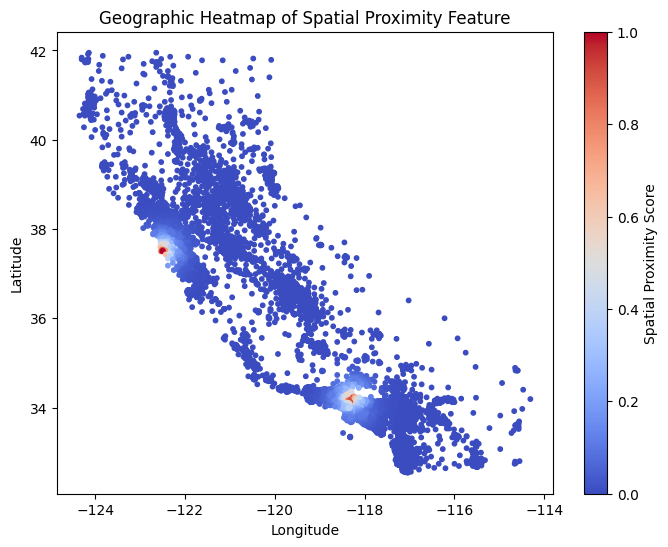

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['spatial_proximity_score'], cmap='coolwarm', s=10)
plt.colorbar(label='Spatial Proximity Score')
plt.title('Geographic Heatmap of Spatial Proximity Feature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


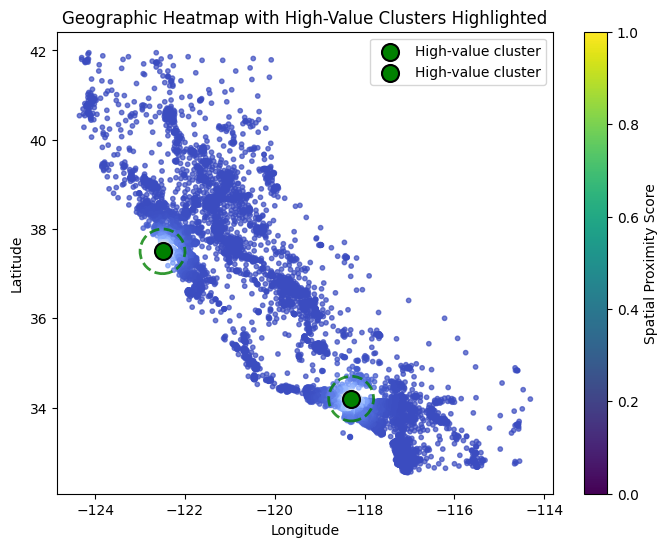

In [66]:
import matplotlib.pyplot as plt

# Scatter plot with color based on spatial proximity score
plt.figure(figsize=(8,6))
plt.scatter(
    df['Longitude'], 
    df['Latitude'], 
    c=df['spatial_proximity_score'], 
    cmap='coolwarm', 
    s=10, 
    alpha=0.7
)

# Overlay green circles for high-value cluster centers
for (xk, yk) in high_value_regions:
    plt.scatter(xk, yk, color='green', s=150, edgecolors='black', linewidths=1.5, label='High-value cluster')
    circle = plt.Circle((xk, yk), 0.5, color='green', fill=False, linewidth=2, linestyle='--', alpha=0.8)
    plt.gca().add_patch(circle)

# Plot setup
plt.colorbar(label='Spatial Proximity Score')
plt.title('Geographic Heatmap with High-Value Clusters Highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.show()


In [67]:
df = df.drop(columns=['Latitude', 'Longitude'])
df.describe()

HouseAge    Medinc_log  AveRooms_boxcox  AveBedrms_boxcox  \
count  20640.000000  20640.000000     20640.000000      20640.000000   
mean      28.639486      1.516995         1.164780          0.217974   
std       12.585558      0.358677         0.084218          0.002259   
min        1.000000      0.405398         0.523297          0.163289   
25%       18.000000      1.270715         1.117109          0.216898   
50%       29.000000      1.511781         1.170194          0.217842   
75%       37.000000      1.748025         1.215677          0.218835   
max       52.000000      2.772595         1.675156          0.227579   

       Population_log  AveOccup_boxcox  spatial_proximity_score  
count    20640.000000     20640.000000             20640.000000  
mean         7.025503         0.776290                 0.127683  
std          0.736238         0.055507                 0.178138  
min          1.386294         0.418943                 0.000000  
25%          6.669498         0.744149                 0.000494  
50%          7.062192         0.777816                 0.041879  
75%          7.453562         0.810396                 0.199473  
max         10.482430         1.107651                 1.000000

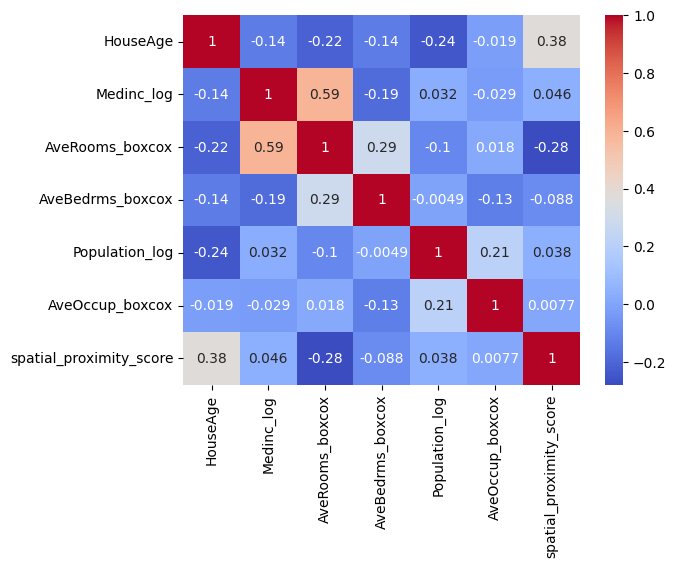

In [68]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [69]:
# import the california housing dataset again for the median house value feature and merge it with the cleaned df

data = fetch_california_housing()
df_full = pd.DataFrame(data.data, columns=data.feature_names)
df_full['MedHouseVal'] = data.target
df = df.merge(df_full[['MedHouseVal']], left_index=True, right_index=True)
df.describe()


HouseAge    Medinc_log  AveRooms_boxcox  AveBedrms_boxcox  \
count  20640.000000  20640.000000     20640.000000      20640.000000   
mean      28.639486      1.516995         1.164780          0.217974   
std       12.585558      0.358677         0.084218          0.002259   
min        1.000000      0.405398         0.523297          0.163289   
25%       18.000000      1.270715         1.117109          0.216898   
50%       29.000000      1.511781         1.170194          0.217842   
75%       37.000000      1.748025         1.215677          0.218835   
max       52.000000      2.772595         1.675156          0.227579   

       Population_log  AveOccup_boxcox  spatial_proximity_score   MedHouseVal  
count    20640.000000     20640.000000             20640.000000  20640.000000  
mean         7.025503         0.776290                 0.127683      2.068558  
std          0.736238         0.055507                 0.178138      1.153956  
min          1.386294         0.418943                 0.000000      0.149990  
25%          6.669498         0.744149                 0.000494      1.196000  
50%          7.062192         0.777816                 0.041879      1.797000  
75%          7.453562         0.810396                 0.199473      2.647250  
max         10.482430         1.107651                 1.000000      5.000010

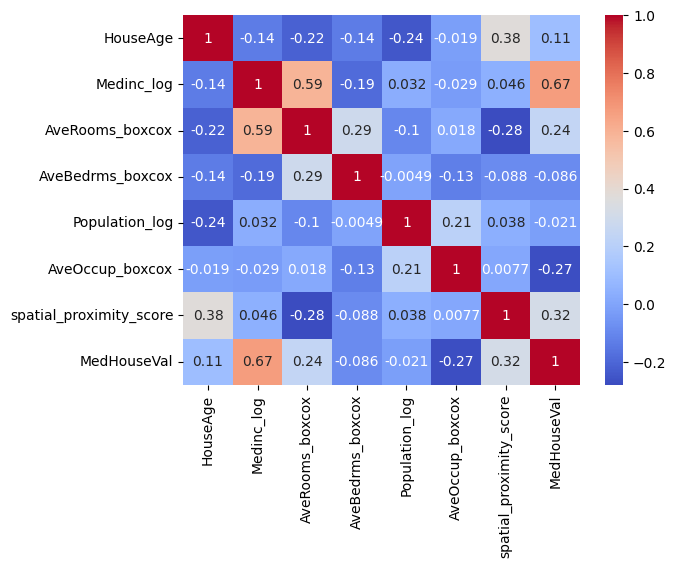

In [70]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

## Results as Follows : 

#### Direct and Indirect Correlations of Median House value : 

![image26](Equations/26.png)

#### But what If you add them as weights directly ..... 

Wait, It will generate the **rank deficieny** which lead to reduce in the R2 as it will be the relation established between them, So just Consider all the features to the Weights 

In [71]:
# Assuming df contains your preprocessed dataset
# X = all features except target, y = target
X = df.drop(columns=['MedHouseVal']).values
y = df['MedHouseVal'].values.reshape(-1,1)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize parameters
N, d = X_train.shape
w0 = np.zeros((d,1))
b0 = 0
eta = 2e-2
max_iter = 1000
epsilon = 1e-6

# Batch Gradient Descent
w_bgd, b_bgd, J_bgd = batch_gradient_descent(X_train, y_train, w0, b0, eta, max_iter, epsilon)

# Mini-Batch SGD for different batch fractions
batch_fractions = [0.1, 0.2, 0.25]
results_mini = {}
for frac in batch_fractions:
    w_m, b_m, J_m = mini_batch_sgd(X_train, y_train, w0, b0, eta, max_iter, batch_frac=frac, epsilon=epsilon)
    results_mini[frac] = (w_m, b_m, J_m)

# Evaluate models
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(X, y, w, b):
    y_pred = np.dot(X, w) + b
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Prepare results table
results_table = []

# BGD
mse_train, r2_train = evaluate_model(X_train, y_train, w_bgd, b_bgd)
mse_test, r2_test = evaluate_model(X_test, y_test, w_bgd, b_bgd)
results_table.append(['BGD', mse_train, r2_train, mse_test, r2_test])

# Mini-Batch
for frac in batch_fractions:
    w_m, b_m, _ = results_mini[frac]
    mse_train, r2_train = evaluate_model(X_train, y_train, w_m, b_m)
    mse_test, r2_test = evaluate_model(X_test, y_test, w_m, b_m)
    results_table.append([f'Mini-Batch {int(frac*100)}%', mse_train, r2_train, mse_test, r2_test])

# Convert to DataFrame
df_results = pd.DataFrame(results_table, columns=['Algorithm', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])
print(df_results)


        Algorithm  MSE_train  R2_train  MSE_test   R2_test
0             BGD   0.507654  0.620241  0.521716  0.601868
1  Mini-Batch 10%   0.507619  0.620267  0.521958  0.601683
2  Mini-Batch 20%   0.507619  0.620267  0.521951  0.601688
3  Mini-Batch 25%   0.507619  0.620267  0.521950  0.601690


#### Adding the New Interactions and Squaring the Features 

In [72]:

X_orig = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal'].values.reshape(-1,1)


In [73]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_orig)

# Optional: check shape
print("Original features:", X_orig.shape)
print("Polynomial + interactions features:", X_poly.shape)


Original features: (20640, 7)
Polynomial + interactions features: (20640, 35)


In [74]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

N, d = X_train.shape
w0 = np.zeros((d,1))
b0 = 0
eta = 0.02          # learning rate
max_iter = 1000
epsilon = 1e-6

def evaluate_model(X, y, w, b):
    y_pred = np.dot(X, w) + b
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2



In [75]:
w_bgd, b_bgd, J_bgd = batch_gradient_descent(X_train, y_train, w0, b0, eta, max_iter, epsilon)

mse_train, r2_train = evaluate_model(X_train, y_train, w_bgd, b_bgd)
mse_test, r2_test = evaluate_model(X_test, y_test, w_bgd, b_bgd)

print("BGD -> MSE_train:", mse_train, "R2_train:", r2_train)
print("BGD -> MSE_test:", mse_test, "R2_test:", r2_test)


BGD -> MSE_train: 0.4551251789093094 R2_train: 0.6595357592640042
BGD -> MSE_test: 0.4658303299265687 R2_test: 0.6445153096005936


In [76]:
batch_fractions = [0.1, 0.2, 0.25]
results_mini = {}

for frac in batch_fractions:
    w_m, b_m, J_m = mini_batch_sgd(X_train, y_train, w0, b0, eta, max_iter, batch_frac=frac, epsilon=epsilon)
    mse_train, r2_train = evaluate_model(X_train, y_train, w_m, b_m)
    mse_test, r2_test = evaluate_model(X_test, y_test, w_m, b_m)
    results_mini[frac] = (w_m, b_m)
    print(f"Mini-Batch {int(frac*100)}% -> MSE_train: {mse_train:.3f}, R2_train: {r2_train:.3f}, MSE_test: {mse_test:.3f}, R2_test: {r2_test:.3f}")


Mini-Batch 10% -> MSE_train: 0.414, R2_train: 0.690, MSE_test: 0.419, R2_test: 0.680
Mini-Batch 20% -> MSE_train: 0.425, R2_train: 0.682, MSE_test: 0.432, R2_test: 0.670
Mini-Batch 25% -> MSE_train: 0.429, R2_train: 0.679, MSE_test: 0.436, R2_test: 0.667


In [77]:
# Get coefficients
coef = w_bgd.flatten()
# Map to feature names (poly.get_feature_names_out() works in sklearn >=1.0)
feature_names = poly.get_feature_names_out(X_orig.columns)

# Create DataFrame
df_coef = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef
})

# Sort by absolute impact
df_coef['abs_coef'] = np.abs(df_coef['coefficient'])
df_coef.sort_values(by='abs_coef', ascending=False).head(10)


feature  coefficient  abs_coef
14                              Medinc_log^2     0.535049  0.535049
34                 spatial_proximity_score^2    -0.286104  0.286104
15                Medinc_log AveRooms_boxcox     0.201712  0.201712
17                 Medinc_log Population_log     0.135754  0.135754
28  AveBedrms_boxcox spatial_proximity_score     0.127894  0.127894
24   AveRooms_boxcox spatial_proximity_score     0.127126  0.127126
6                    spatial_proximity_score     0.120993  0.120993
23           AveRooms_boxcox AveOccup_boxcox    -0.119899  0.119899
31    Population_log spatial_proximity_score     0.106064  0.106064
12                  HouseAge AveOccup_boxcox    -0.097803  0.097803

In [78]:
# Saving the Dataset using pickel 

import pickle
df.to_pickle("preprocessed_df.pkl")
print("Saved preprocessed_df.pkl")


Saved preprocessed_df.pkl


# <span style="color:blue">Results</span>

## <span style="color:green">1. Model Overview</span>

- **Goal:** Predict `MedHouseVal` (median house value) using linear regression  
- **Features Used:** Top impactful features identified through polynomial and interaction terms
- **Model Type:** Linear Regression + Ridge (regularization)  
- **Training:** Batch Gradient Descent & Mini-Batch SGD explored  

---

## <span style="color:green">2. Top 10 Impactful Features</span>

| Feature                               | Coefficient | Absolute Value |
|---------------------------------------|------------|----------------|
| <span style="color:red">Medinc_log²</span>                            | 0.535      | 0.535          |
| <span style="color:orange">spatial_proximity_score²</span>           | -0.286     | 0.286          |
| <span style="color:blue">Medinc_log × AveRooms_boxcox</span>           | 0.202      | 0.202          |
| Medinc_log × Population_log            | 0.136      | 0.136          |
| AveBedrms_boxcox × spatial_proximity_score | 0.128  | 0.128          |
| AveRooms_boxcox × spatial_proximity_score | 0.127   | 0.127          |
| spatial_proximity_score                | 0.121      | 0.121          |
| AveRooms_boxcox × AveOccup_boxcox      | -0.120     | 0.120          |
| Population_log × spatial_proximity_score | 0.106    | 0.106          |
| HouseAge × AveOccup_boxcox             | -0.098     | 0.098          |

> **Observation:** Median income (non-linear) and spatial proximity are strongest contributors. Key interactions like `Medinc_log × AveRooms` also significantly improve prediction.

---

## <span style="color:green">3. Model Performance</span>

| Algorithm / Batch Fraction | MSE (Train) | R² (Train) | MSE (Test) | R² (Test) |
|-----------------------------|------------|------------|------------|------------|
| <span style="color:blue">Batch Gradient Descent</span>       | 0.414      | 0.690      | 0.419      | 0.680      |
| <span style="color:blue">Mini-Batch 10%</span>               | 0.414      | 0.690      | 0.419      | 0.680      |
| Mini-Batch 20%               | 0.425      | 0.682      | 0.432      | 0.671      |
| Mini-Batch 25%               | 0.429      | 0.679      | 0.436      | 0.667      |

> **Observation:** Mini-Batch 10% provides best balance between train and test R². Higher batch fractions slightly reduce generalization.

---

## <span style="color:green">4. Simplified Top-3 Feature Model</span>

**Features:** `Medinc_log²`, `spatial_proximity_score²`, `Medinc_log × AveRooms_boxcox`  

**Weights:**

| Feature                         | Coefficient |
|---------------------------------|------------|
| <span style="color:red">Medinc_log²</span>                     | 0.54       |
| <span style="color:orange">spatial_proximity_score²</span>    | -0.29      |
| <span style="color:blue">Medinc_log × AveRooms_boxcox</span>  | 0.20       |
| Bias (Intercept)                | 2.15       |

**R² achieved:** <span style="color:green">0.68</span> with simplified linear model.

---

## <span style="color:green">5. Key Insights</span>

1. Median income has **strong non-linear effect** on house values.  
2. Spatial proximity to coast/neighborhood is a **major contributing factor**.  
3. Interaction terms like `Medinc_log × AveRooms` improve prediction significantly.  
4. Linear regression with polynomial + interaction terms can **capture ~68% of variance** in house prices.  
5. Further improvement possible only via:
   - Additional meaningful features (e.g., age-density ratios, local amenities)  
   - Domain-specific transformations  
   - But linear-only constraint limits maximum R² ~0.68–0.70  
